# Train_MLP

In [3]:
import numpy as np
import pandas as pd

CLASSES = [ "Bull" ,  "Bear" ] 
LABEL_BULL = CLASSES.index("Bull")
LABEL_BEAR = CLASSES.index("Bear")

datasets = np.load("datasets.npz")
x_train,y_train = datasets["x_train"], datasets["y_train"]
x_val, y_val = datasets["x_val"], datasets["y_val"]
x_test, y_test = datasets["x_test"], datasets["y_test"]

# Label distribution
label_distribution = pd.DataFrame([{"Dataset" : "train",
                                                         "Bull":np.count_nonzero(y_train == LABEL_BULL),
                                                         "Bear": np.count_nonzero(y_train == LABEL_BEAR)},
                                                         {"Dataset" : "val",
                                                         "Bull":np.count_nonzero(y_val == LABEL_BULL),
                                                         "Bear": np.count_nonzero(y_val == LABEL_BEAR)},
                                                         {"Dataset" : "test",
                                                         "Bull":np.count_nonzero(y_test == LABEL_BULL),
                                                         "Bear": np.count_nonzero(y_test == LABEL_BEAR)}])
label_distribution

,Dataset,Bull,Bear
0,train,888,803
1,val,263,220
2,test,120,120


In [2]:
#x_train.shape

(1691, 100, 7)

In [3]:
#1690 * 100 *7    # total trainning datas amount 

1183000

# Construct model モデルの作成 

In [4]:
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model

# Build model
n_time_steps = x_train.shape[1]
n_features = x_train.shape[ 2 ]

input_layer = Input(shape = (n_time_steps , n_features))
x = Flatten()(input_layer)
x = Dense(256, activation = "relu")(x)  #ノード
x = Dense(256, activation = "relu")(x) # ノード
output_layer = Dense(len(CLASSES), activation = "softmax")(x)

model = Model(inputs = input_layer, outputs = output_layer)
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 7)]          0         
                                                                 
 flatten (Flatten)           (None, 700)               0         
                                                                 
 dense (Dense)               (None, 256)               179456    
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 2)                 514       
                                                                 
Total params: 245,762
Trainable params: 245,762
Non-trainable params: 0
_________________________________________________________________


In [5]:
# if trainable params is too big , bigger than tainning datas a lot  it will  be overfit problem 

# Trainning

In [5]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import to_categorical

model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"] )

model_checkpoint = ModelCheckpoint(filepath="best_model.hdf5", monitor = "val_loss",
                                  save_best_only=True)
early_stopping = EarlyStopping(monitor="val_loss", patience=100, restore_best_weights=True)
callbacks = [model_checkpoint, early_stopping]

train_history = model.fit(x_train,to_categorical(y_train),
                         validation_data=(x_val, to_categorical(y_val)),
                         batch_size=2048, epochs=1000, callbacks=[callbacks])

Epoch 1/1000
1/1 [==============================] - 1s 1s/step - loss: 14896938.0000 - accuracy: 0.5370 - val_loss: 151206976.0000 - val_accuracy: 0.4555
Epoch 2/1000
1/1 [==============================] - 0s 76ms/step - loss: 145971344.0000 - accuracy: 0.4749 - val_loss: 80983912.0000 - val_accuracy: 0.4555
Epoch 3/1000
1/1 [==============================] - 0s 65ms/step - loss: 79220512.0000 - accuracy: 0.4749 - val_loss: 9440701.0000 - val_accuracy: 0.5590
Epoch 4/1000
1/1 [==============================] - 0s 38ms/step - loss: 10089698.0000 - accuracy: 0.5263 - val_loss: 41347540.0000 - val_accuracy: 0.5445
Epoch 5/1000
1/1 [==============================] - 0s 39ms/step - loss: 42531204.0000 - accuracy: 0.5251 - val_loss: 37301516.0000 - val_accuracy: 0.5445
Epoch 6/1000
1/1 [==============================] - 0s 41ms/step - loss: 38270880.0000 - accuracy: 0.5251 - val_loss: 15827423.0000 - val_accuracy: 0.5528
Epoch 7/1000
1/1 [==============================] - 0s 41ms/step - loss

1/1 [==============================] - 0s 42ms/step - loss: 1457349.6250 - accuracy: 0.5831 - val_loss: 1964651.8750 - val_accuracy: 0.5031
Epoch 55/1000
1/1 [==============================] - 0s 41ms/step - loss: 1252384.7500 - accuracy: 0.5819 - val_loss: 2229936.5000 - val_accuracy: 0.5052
Epoch 56/1000
1/1 [==============================] - 0s 43ms/step - loss: 1390292.5000 - accuracy: 0.5677 - val_loss: 2052180.1250 - val_accuracy: 0.5114
Epoch 57/1000
1/1 [==============================] - 0s 76ms/step - loss: 1248375.2500 - accuracy: 0.5736 - val_loss: 1865676.6250 - val_accuracy: 0.4783
Epoch 58/1000
1/1 [==============================] - 0s 41ms/step - loss: 1217639.8750 - accuracy: 0.5920 - val_loss: 1879692.6250 - val_accuracy: 0.4783
Epoch 59/1000
1/1 [==============================] - 0s 42ms/step - loss: 1269988.6250 - accuracy: 0.5955 - val_loss: 1875336.8750 - val_accuracy: 0.4948
Epoch 60/1000
1/1 [==============================] - 0s 40ms/step - loss: 1117526.1250 - a

1/1 [==============================] - 0s 38ms/step - loss: 430162.1250 - accuracy: 0.7014 - val_loss: 1535963.3750 - val_accuracy: 0.5114
Epoch 108/1000
1/1 [==============================] - 0s 40ms/step - loss: 419287.6875 - accuracy: 0.7020 - val_loss: 1579494.0000 - val_accuracy: 0.4948
Epoch 109/1000
1/1 [==============================] - 0s 38ms/step - loss: 436826.4062 - accuracy: 0.6990 - val_loss: 1537829.3750 - val_accuracy: 0.5093
Epoch 110/1000
1/1 [==============================] - 0s 40ms/step - loss: 434682.1250 - accuracy: 0.7008 - val_loss: 1561407.0000 - val_accuracy: 0.5114
Epoch 111/1000
1/1 [==============================] - 0s 70ms/step - loss: 409257.2500 - accuracy: 0.7161 - val_loss: 1530755.7500 - val_accuracy: 0.5155
Epoch 112/1000
1/1 [==============================] - 0s 65ms/step - loss: 385338.2812 - accuracy: 0.7138 - val_loss: 1520667.5000 - val_accuracy: 0.5093
Epoch 113/1000
1/1 [==============================] - 0s 39ms/step - loss: 386485.2500 - ac

1/1 [==============================] - 0s 40ms/step - loss: 176253.1562 - accuracy: 0.8190 - val_loss: 1412660.2500 - val_accuracy: 0.5197
Epoch 161/1000
1/1 [==============================] - 0s 43ms/step - loss: 173228.7812 - accuracy: 0.8161 - val_loss: 1421842.3750 - val_accuracy: 0.5176
Epoch 162/1000
1/1 [==============================] - 0s 43ms/step - loss: 169627.5000 - accuracy: 0.8173 - val_loss: 1412073.6250 - val_accuracy: 0.5217
Epoch 163/1000
1/1 [==============================] - 0s 36ms/step - loss: 165092.7344 - accuracy: 0.8202 - val_loss: 1413390.1250 - val_accuracy: 0.5155
Epoch 164/1000
1/1 [==============================] - 0s 47ms/step - loss: 161501.0625 - accuracy: 0.8208 - val_loss: 1414820.1250 - val_accuracy: 0.5176
Epoch 165/1000
1/1 [==============================] - 0s 75ms/step - loss: 158851.6562 - accuracy: 0.8155 - val_loss: 1405720.1250 - val_accuracy: 0.5093
Epoch 166/1000
1/1 [==============================] - 0s 40ms/step - loss: 158609.0000 - ac

1/1 [==============================] - 0s 32ms/step - loss: 75859.9141 - accuracy: 0.8717 - val_loss: 1451144.7500 - val_accuracy: 0.4969
Epoch 214/1000
1/1 [==============================] - 0s 58ms/step - loss: 83938.8594 - accuracy: 0.8604 - val_loss: 1422778.1250 - val_accuracy: 0.5010
Epoch 215/1000
1/1 [==============================] - 0s 37ms/step - loss: 71191.0625 - accuracy: 0.8776 - val_loss: 1421962.6250 - val_accuracy: 0.5010
Epoch 216/1000
1/1 [==============================] - 0s 41ms/step - loss: 68452.3359 - accuracy: 0.8835 - val_loss: 1440665.8750 - val_accuracy: 0.4928
Epoch 217/1000
1/1 [==============================] - 0s 31ms/step - loss: 72352.1484 - accuracy: 0.8746 - val_loss: 1418059.3750 - val_accuracy: 0.4969
Epoch 218/1000
1/1 [==============================] - 0s 49ms/step - loss: 66046.9141 - accuracy: 0.8823 - val_loss: 1418852.6250 - val_accuracy: 0.4990
Epoch 219/1000
1/1 [==============================] - 0s 40ms/step - loss: 62505.5312 - accuracy:

1/1 [==============================] - 0s 40ms/step - loss: 35006.4492 - accuracy: 0.9243 - val_loss: 1425924.8750 - val_accuracy: 0.4948
Epoch 267/1000
1/1 [==============================] - 0s 42ms/step - loss: 35701.3555 - accuracy: 0.9231 - val_loss: 1431375.3750 - val_accuracy: 0.4783
Epoch 268/1000
1/1 [==============================] - 0s 36ms/step - loss: 34226.9727 - accuracy: 0.9231 - val_loss: 1420498.8750 - val_accuracy: 0.4803
Epoch 269/1000
1/1 [==============================] - 0s 35ms/step - loss: 32906.1406 - accuracy: 0.9302 - val_loss: 1415437.7500 - val_accuracy: 0.4865
Epoch 270/1000
1/1 [==============================] - 0s 40ms/step - loss: 32302.3984 - accuracy: 0.9326 - val_loss: 1417025.2500 - val_accuracy: 0.4803
Epoch 271/1000
1/1 [==============================] - 0s 41ms/step - loss: 32237.1348 - accuracy: 0.9284 - val_loss: 1405837.1250 - val_accuracy: 0.4845
Epoch 272/1000
1/1 [==============================] - 0s 41ms/step - loss: 30867.5879 - accuracy:

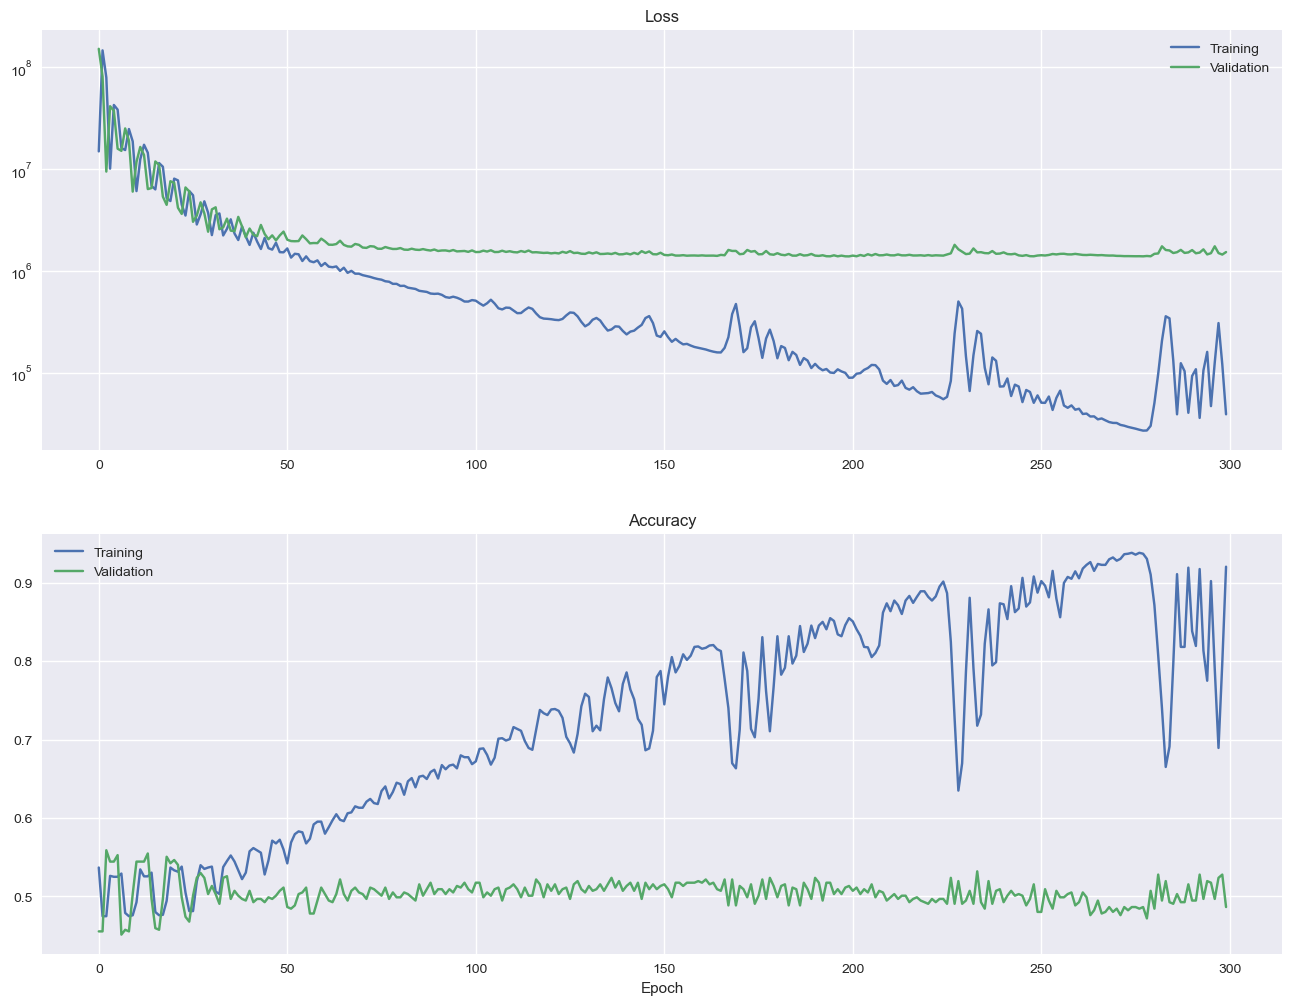

In [6]:
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8")
fig, axes = plt.subplots(2,1,figsize=(16,12))

# 
axes[0].set_title("Loss")
axes[0].set_yscale("log")
axes[0].plot(train_history.history["loss"], label="Training")
axes[0].plot(train_history.history["val_loss"], label="Validation")
axes[0].legend()

axes[1].set_title("Accuracy")
axes[1].plot(train_history.history["accuracy"], label="Training")
axes[1].plot(train_history.history["val_accuracy"], label="Validation")
axes[1].set_xlabel("Epoch")
axes[1].legend()


In [ ]:
# train situaction's 訓練結果畫出來 
# up pic　loss function　validation data vs training data
# ＬＯＳＳ值越低　代表模型準確度越高　訓練模型只會餵入ＴＲＡＩＮＩＮＧ　ＤＡＴＡ所以ＬＯＳＳ值一錠是永遠往下的
#代表模型越來越你和ＴＲＡ　ＤＡＴＡ　但是這個的準確值可能只對ＴＲＡＩＮＤＡＴＡ準確　對其他的就不行
#如果真是這樣　這個模型只會ＯＶＥＲ　ＦＩＴＴＩＮＧ　失去泛用性　這樣的模型是沒用的
#為了監察何時開始ＯＶＥＲ　ＦＩＴ　唯有利用ＶＡＬＩ　ＤＡＴＡ
#在每個回合結束時讓模型跑一下ＶＡＬＩ　
#算出ＶＡＬＩ　ＬＯＳＳ
#一開始有下降　代表準確度的確有提升又不失泛用性　但后後來ＯＶＥＲ　ＦＩＴＴＩＮＧ漸漸浮現
#ＶＡＬ　ＬＯＳＳ不再下降
#第二幅圖是看準確度　跟ＬＯＳＳ相反　準確度是越高越好
#同樣道理　ＴＡＲＩＮ的ＡＣＵ只會向上　而ＶＡＬ的ＡＣＵ會先向上　然後因為模型ＯＶＥＲ　ＦＩＴ而停止轉而向下
#ＡＣＵ曲線通常不會像ＬＯＳＳ曲線平滑　因為ＡＣＵ不是連續函數
#最終選出來用的模型有兩個　一個是ＶＡＬ　ＬＯＳＳ值最低的回合
#另一個是ＶＡＬ　ＡＣＵ最高的回合
#ＡＣＵ表顯不穩定　所以選擇ＬＯＳＳ
#ＥＡＲＬＹ　ＳＴＯＰ　的ＣＡＬＬＢＡＣＫ監察到最低值的ＬＯＳＳ而結束整個訓練　而這一個最低ＬＯＳＳ值得模型也被儲存了起來
#因為有ＭＯＤＥＬ　ＣＨＥＣＫＰＯＩＮＴ這個ＣＡＬＬＢＡＣＫ　ＦＵＮＣＴＩＯＮ

#測試集就是要拿來量度最終的準確度
#剛剛訓練好的模型已被ＭＯＤＥＬ　ＣＨＥＣＫＰＯＩＮＴ程序儲存
#而ＴＥＳＴ　ＤＡＴＡＳＥＴ在一開始建立數據集時已經用好　他跟　ＴＲＡＩＮＤＡＴＡ　ＶＡＬＤＡＴＡ
#一同被放到ＮＰＺ檔案裡